In [1]:
%matplotlib inline

In [76]:
import pandas as pd
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Desktop/output_size/stats.sqlite')

In [77]:
q = pd.read_sql_table('stats', conn)
q.tail()

,treatment_id,replicate_id,generation,kind,value
41973,1,2,50000,C_4,0.000063
41974,1,2,50000,C_5,0.000025
41975,1,2,50000,C_6,0.003231
41976,1,2,50000,C_7,0.092792
41977,1,2,50000,CT,1.342874


In [78]:
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)

In [79]:
q.tail()

value
treatment_id replicate_id generation kind          
1            2            50000      C_4   0.000063
                                     C_5   0.000025
                                     C_6   0.003231
                                     C_7   0.092792
                                     CT    1.342874

In [118]:
z = pd.read_sql_query('select generation, kind, value from stats where treatment_id = 3 and replicate_id = 2', conn, index_col=['generation', 'kind'])
z.tail()

value
generation kind            
50000      C_5     0.000036
           C_6     2.641100
           C_7     0.561604
           FitAve  0.994875
           FitVar  0.000738

In [119]:
zz = z.unstack(-1)
zz.tail()

value                                                        \
kind              CT       C_0       C_1       C_2       C_3 C_4       C_5   
generation                                                                   
49400            NaN       NaN       NaN       NaN       NaN NaN       NaN   
49500       4.100985  0.565615  0.000000  0.000124  0.000000   0  0.000261   
49600            NaN       NaN       NaN       NaN       NaN NaN       NaN   
49800            NaN       NaN       NaN       NaN       NaN NaN       NaN   
50000       3.715403  0.498532  0.000162  0.013659  0.000311   0  0.000036   

                                                    
kind             C_6       C_7    FitAve    FitVar  
generation                                          
49400            NaN       NaN  0.997958  0.000366  
49500       2.970467  0.564517       NaN       NaN  
49600            NaN       NaN  0.997104  0.000544  
49800            NaN       NaN  0.996292  0.000710  
50000       2.641100  0.561604  0.994875  0.000738

In [120]:
zz.columns = zz.columns.levels[1]

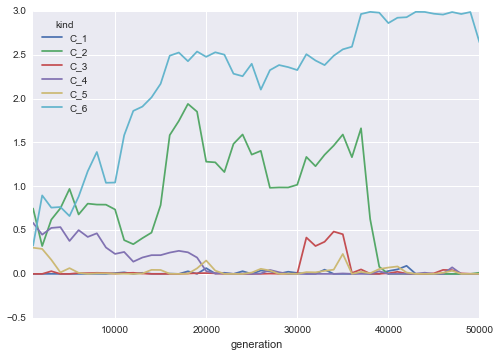

In [125]:
zz.dropna(0).plot(y=['C_%d' % (i+1) for i in range(6)])

In [73]:
finals = pd.read_sql_query('select name, value from stats s, treatment t where generation=10000 and kind = "FitAve" and s.treatment_id = t.treatment_id', conn)

In [74]:
finals.tail()

,name,value
75,output_4,0.989313
76,output_4,0.988953
77,output_4,0.993756
78,output_4,0.964844
79,output_4,0.985187


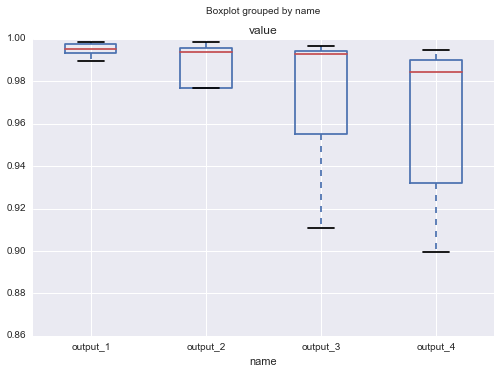

In [75]:
finals.boxplot(column='value',by='name')

In [63]:
finals.groupby('name').count()

,value
name,
output_1,20
output_2,20
output_3,20
output_4,20
